# Example Usage

These examples appear in the R documentation for the Gibbs.regression function. Each one creates a mock data set and then fits a linear model to it, and compares the results to traditional regression.

In [1]:
library(lrgs)
library(IRdisplay)

In [2]:
## example using the default Ngauss=1 with no measurement errors
x <- rnorm(500, 0, 5)
y <- pi*x + rnorm(length(x), 0, 0.1)
post <- Gibbs.regression(x, y, NULL, 100, trace='bsmt', fix='xy')
m <- lm(y~x)

pdf 
  2

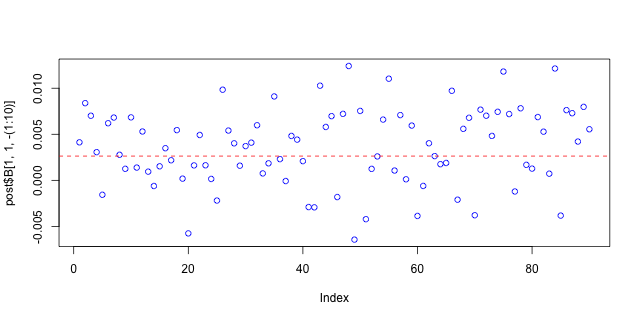

pdf 
  2

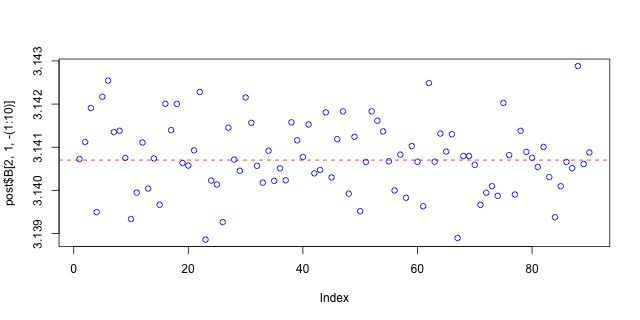

pdf 
  2

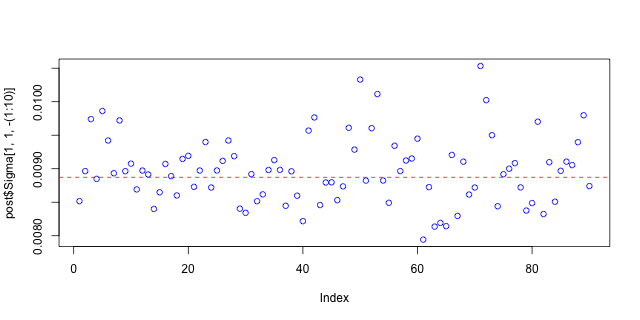

pdf 
  2

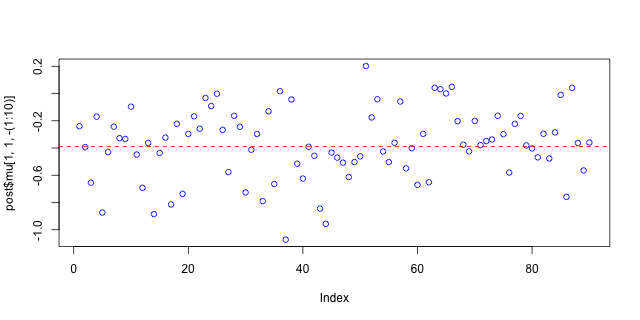

pdf 
  2

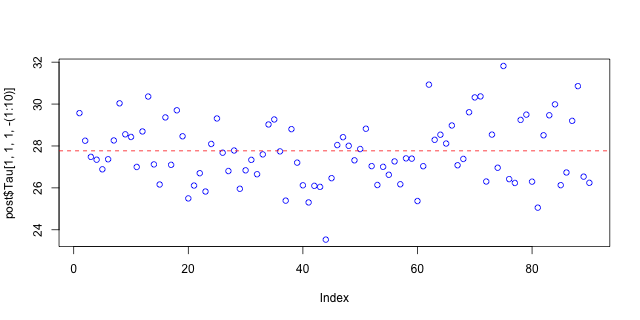

In [3]:
plot(post$B[1,1,-(1:10)], col=4); abline(h=m$coefficients[1], lty=2, col=2);
plot(post$B[2,1,-(1:10)], col=4); abline(h=m$coefficients[2], lty=2, col=2);
plot(post$Sigma[1,1,-(1:10)], col=4); abline(h=var(m$residuals), lty=2, col=2);
plot(post$mu[1,1,-(1:10)], col=4); abline(h=mean(x), lty=2, col=2);
plot(post$Tau[1,1,1,-(1:10)], col=4); abline(h=var(x), lty=2, col=2);

In [4]:
## verbose example using a Dirichlet process, including measurement errors
xx <- rnorm(100, c(-15,0,15), 1)
yy <- xx + rnorm(length(xx)) + rnorm(length(xx), 0, 3)
xx <- xx + rnorm(length(xx))
M <- array(0, dim=c(2,2,length(xx)))
M[1,1,] <- 1
M[2,2,] <- 1
nmc = 100
post = Gibbs.regression(xx, yy, M, nmc, dirichlet=TRUE, trace='bsgmta')
m <- lm(yy~xx)

pdf 
  2

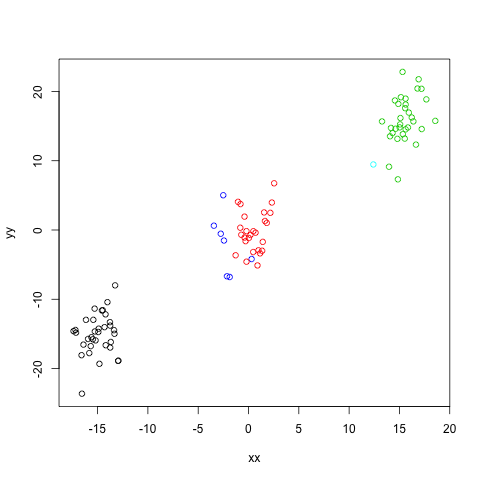

In [5]:
plot(xx, yy, col=post$G[,nmc]) # plot clusters at the last iteration

pdf 
  2

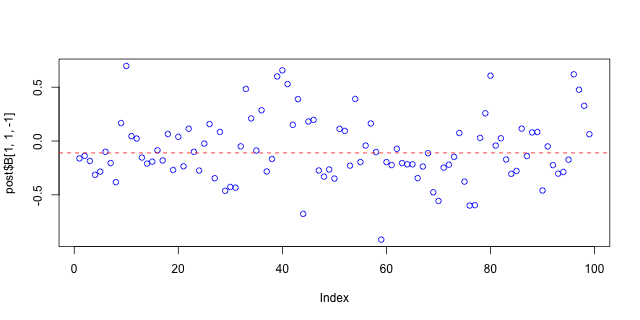

pdf 
  2

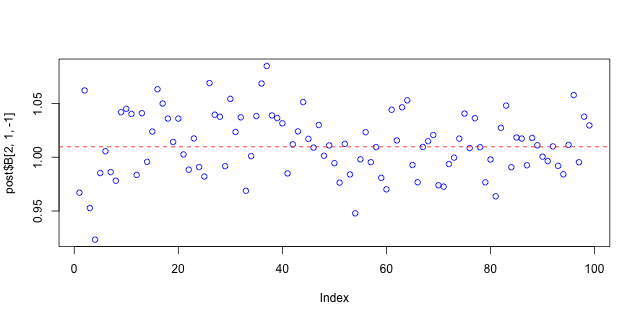

pdf 
  2

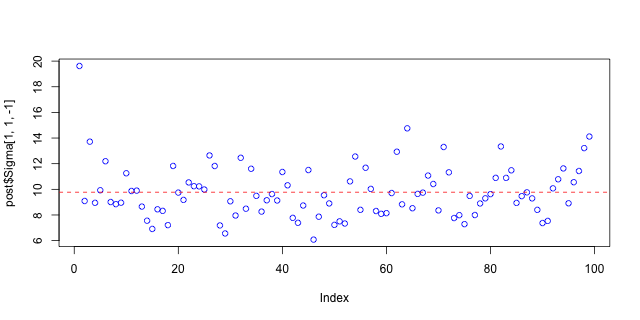

pdf 
  2

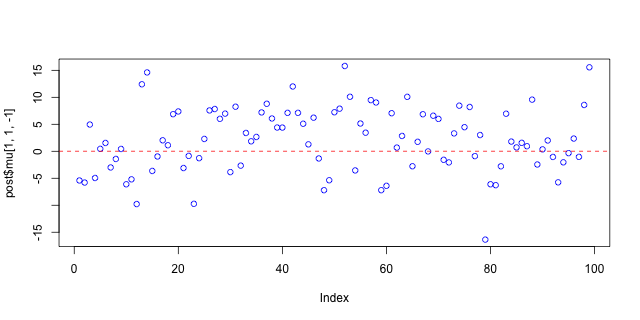

pdf 
  2

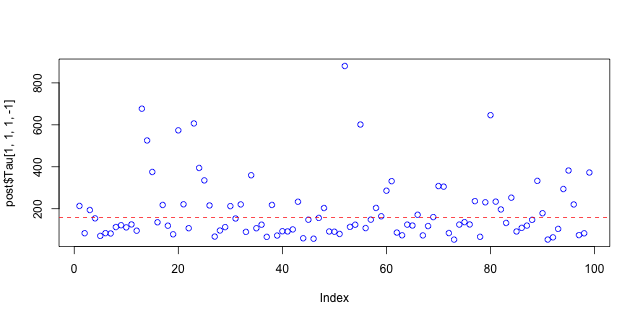

pdf 
  2

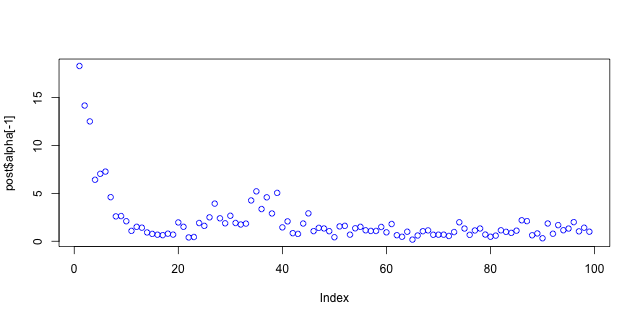

In [6]:
plot(post$B[1,1,-1], col=4); abline(h=m$coefficients[1], lty=2, col=2)
plot(post$B[2,1,-1], col=4); abline(h=m$coefficients[2], lty=2, col=2)
plot(post$Sigma[1,1,-1], col=4); abline(h=var(m$residuals), lty=2, col=2)
plot(post$mu[1,1,-1], col=4); abline(h=mean(xx), lty=2, col=2)
plot(post$Tau[1,1,1,-1], col=4); abline(h=var(xx), lty=2, col=2)
plot(post$alpha[-1], col=4)